# Featurizing the dataset with MatterVial

This notebook goes through the main functions and objects implemented in the MatterVial package. Based on a dataset containing ~4,000 entries of type (mp_id, structure, refractive index) taken from the MaterialsProject (MP).

## 1. Loading the dataset

In this example the dataset is a dataframe saved as a pickle. But it can be any format as long as you can retreive the structures and targets.

In [1]:
import pandas as pd
df = pd.read_pickle('data/df_ref_index.pkl')
print('{} datapoints'.format(len(df)))
df.head()

4022 datapoints


,structure,ref_index
mp-624234,"[[0.67808954 1.32800354 5.90141888] Te, [1.500...",2.440483
mp-560478,"[[-0.62755181 6.55361247 9.268476 ] Ba, [4....",1.790685
mp-556346,"[[4.43332093 4.12714801 8.8721209 ] Pr, [ 1.40...",2.056131
mp-13676,"[[-0.14481557 3.41229366 4.12618551] O, [3.2...",2.023772
mp-7610,"[[ 0.12549448 3.01287591 -0.20434955] Li, [1....",1.745509


## 2. Import the featurizers

In this section, we will explore various featurizers provided by the MatterVial package. These featurizers are used to convert the structural information of materials into numerical representations that can be used for machine learning models. The featurizers we will be using include:

- `l_MM_v1`: Latent MatMiner Featurizer version 1
- `l_OFM_v1`: Latent OFM Featurizer version 1
- `mvl16`: MVL Featurizer with 16 features
- `mvl32`: MVL Featurizer with 32 features
- `adj_megnet`: Adjacent MEGNet Featurizer
- `adj_megnet_layer16`: Adjacent MEGNet Featurizer with 16 layers

We will apply these featurizers to our dataset and generate feature sets that will be used for training and evaluating machine learning models.

In [ ]:
## Code to generate the features, might take a while
## if not using GPU acceleration. Consider using the
## pre-generated features in the data folder instead.

# from mattervial.featurizers.structure import ( l_MM_v1, 
#                                         l_OFM_v1, 
#                                         mvl32, 
#                                         mvl16
#                                        )
# print("Featurizing with l_MM_v1...")
# df_mmv1 = l_MM_v1.get_features(df['structure'])
# print("l_MM_v1 features shape:", df_mmv1.shape)

# print("Featurizing with l_OFM_v1...")
# df_ofm = l_OFM_v1.get_features(df['structure'])
# print("l_OFM_v1 features shape:", df_ofm.shape)

# print("Featurizing with mvl32...")
# df_mvl32 = mvl32.get_features(df['structure'])
# print("mvl32 features shape:", df_mvl32.shape)

# print("Featurizing with mvl16...")
# df_mvl16 = mvl16.get_features(df['structure'])
# print("mvl16 features shape:", df_mvl16.shape)


Featurizing with l_MM_v1...


Total params: 681,702
Following invalid structures: [].
l_MM_v1 features shape: (4022, 759)
Featurizing with l_OFM_v1...
Total params: 644,652
Following invalid structures: [].
l_OFM_v1 features shape: (4022, 189)
Featurizing with mvl32...
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
mvl32 features shape: (4022, 128)
Featurizing with mvl16...
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
mvl16 features shape: (4022, 64)


In [11]:
# Save all dataframes to the ./data folder
# df_mmv1.to_pickle('./data/df_mmv1.pkl')
# df_ofm.to_pickle('./data/df_ofm.pkl')
# df_mvl32.to_pickle('./data/df_mvl32.pkl')
# df_mvl16.to_pickle('./data/df_mvl16.pkl')

# print("Dataframes have been saved to the ./data folder.")

Dataframes have been saved to the ./data folder.


In [2]:
## Load the dataframes from the ./data folder
import pandas as pd

# Load the dataframes from the pickle files
df_mmv1 = pd.read_pickle('./data/df_mmv1.pkl')
df_ofm = pd.read_pickle('./data/df_ofm.pkl')
df_mvl32 = pd.read_pickle('./data/df_mvl32.pkl')
df_mvl16 = pd.read_pickle('./data/df_mvl16.pkl')

print("Dataframes have been loaded from the ./data folder.")

Dataframes have been loaded from the ./data folder.


Following cells will train and execute the adjacent models to get features. You could skip to load them from the `./data` folder.

In [ ]:
# The adjacent model needs to be trained beforehand.
# It is custom made for this dataset including the target.
from mattervial.featurizers.structure import ( adj_megnet,
                                        adj_megnet_layer16
                                       )
print("Training adj_megnet...")
# Consider reading the docs for the train_adjacent_megnet function
# before using it in your own projects.
adj_megnet.train_adjacent_megnet(df['structure'], df['ref_index'],
                                 adjacent_model_path='./data',
                                 max_epochs=10)

print("Featurizing with adj_megnet...")
df_adj_megnet = adj_megnet.get_features(df['structure'], model_path='./data')
print("adj_megnet features shape:", df_adj_megnet.shape)

print("Featurizing with adj_megnet_layer16...")
df_adj_megnet_layer16 = adj_megnet_layer16.get_features(df['structure'], model_path='./data')
print("adj_megnet_layer16 features shape:", df_adj_megnet_layer16.shape)

Training adj_megnet...
Featurizing with adj_megnet...


Total params: 167,761
Features calculated for model Adjacent.
adj_megnet features shape: (4022, 32)
Featurizing with adj_megnet_layer16...
Total params: 167,761
Features calculated for model Adjacent.
adj_megnet_layer16 features shape: (4022, 16)


In [5]:
# Save dataframes to the ./data folder
df_adj_megnet.to_pickle('./data/df_adj_megnet.pkl')
df_adj_megnet_layer16.to_pickle('./data/df_adj_megnet_layer16.pkl')

print("Dataframes have been saved to the ./data folder.")

Dataframes have been saved to the ./data folder.


Load the dataframes with the adjacent GNN model features.

In [3]:
import pandas as pd

# Load the dataframes from the pickle files
df_adj_megnet = pd.read_pickle('./data/df_adj_megnet.pkl')
df_adj_megnet_layer16 = pd.read_pickle('./data/df_adj_megnet_layer16.pkl')

print("Dataframes have been loaded from the ./data folder.")

Dataframes have been loaded from the ./data folder.


### (b) Test the different feature sets for prediction
We use scikit-learn models and XGBoost to evaluate the prediction performance of various feature combinations. 

In [4]:
# We will now clean the features by removing the 'structure' column
def remove_structure_column(X):
    # Drop the 'structure' column if it exists
    if 'structure' in X.columns:
        X = X.drop(columns=['structure'])
    return X
# Removes 'structure' column from the features 
df_mmv1 = remove_structure_column(df_mmv1)
df_ofm = remove_structure_column(df_ofm)
df_mvl32 = remove_structure_column(df_mvl32)
df_mvl16 = remove_structure_column(df_mvl16)
df_adj_megnet = remove_structure_column(df_adj_megnet)
df_adj_megnet_layer16 = remove_structure_column(df_adj_megnet_layer16)

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
    
# Ensure that the feature dataframes have the same index as df
df_mmv1.index = df.index
df_ofm.index = df.index
df_mvl32.index = df.index
df_mvl16.index = df.index
df_adj_megnet.index = df.index
df_adj_megnet_layer16.index = df.index

# Define combinations of features
feature_combinations = {
    'l_MM_v1': [df_mmv1],
    'l_MM_v1 + l_OFM_v1': [df_mmv1, df_ofm],
    'l_MM_v1 + l_OFM_v1 + mvl32': [df_mmv1, df_ofm, df_mvl32],
    'l_MM_v1 + l_OFM_v1 + mvl16': [df_mmv1, df_ofm, df_mvl16],
    'l_MM_v1 + l_OFM_v1 + mvl32 + adj_megnet': [df_mmv1, df_ofm, df_mvl32, df_adj_megnet],
    'l_MM_v1 + l_OFM_v1 + mvl16 + adj_megnet_layer16': [df_mmv1, df_ofm, df_mvl16, df_adj_megnet_layer16]
}

# Initialize a dataframe to store metrics
metrics_df = pd.DataFrame(columns=['Combination', 'MAE', 'RMSE', 'R2'])

# Loop over each combination
for combination_name, feature_dfs in feature_combinations.items():
    print(f'Processing combination: {combination_name}')
    # Concatenate features
    X = pd.concat(feature_dfs, axis=1)
    y = df['ref_index']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    metrics_df = metrics_df.append({
        'Combination': combination_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }, ignore_index=True)
    
    print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')

Processing combination: l_MM_v1


/tmp/ipykernel_1471816/2624102244.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


MAE: 0.0963, RMSE: 0.1690, R2: 0.8448
Processing combination: l_MM_v1 + l_OFM_v1


/tmp/ipykernel_1471816/2624102244.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


MAE: 0.0927, RMSE: 0.1698, R2: 0.8434
Processing combination: l_MM_v1 + l_OFM_v1 + mvl32


/tmp/ipykernel_1471816/2624102244.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


MAE: 0.0813, RMSE: 0.1537, R2: 0.8716
Processing combination: l_MM_v1 + l_OFM_v1 + mvl16


/tmp/ipykernel_1471816/2624102244.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


MAE: 0.0811, RMSE: 0.1554, R2: 0.8689
Processing combination: l_MM_v1 + l_OFM_v1 + mvl32 + adj_megnet


/tmp/ipykernel_1471816/2624102244.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


MAE: 0.0703, RMSE: 0.1371, R2: 0.8978
Processing combination: l_MM_v1 + l_OFM_v1 + mvl16 + adj_megnet_layer16
MAE: 0.0671, RMSE: 0.1247, R2: 0.9156


/tmp/ipykernel_1471816/2624102244.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


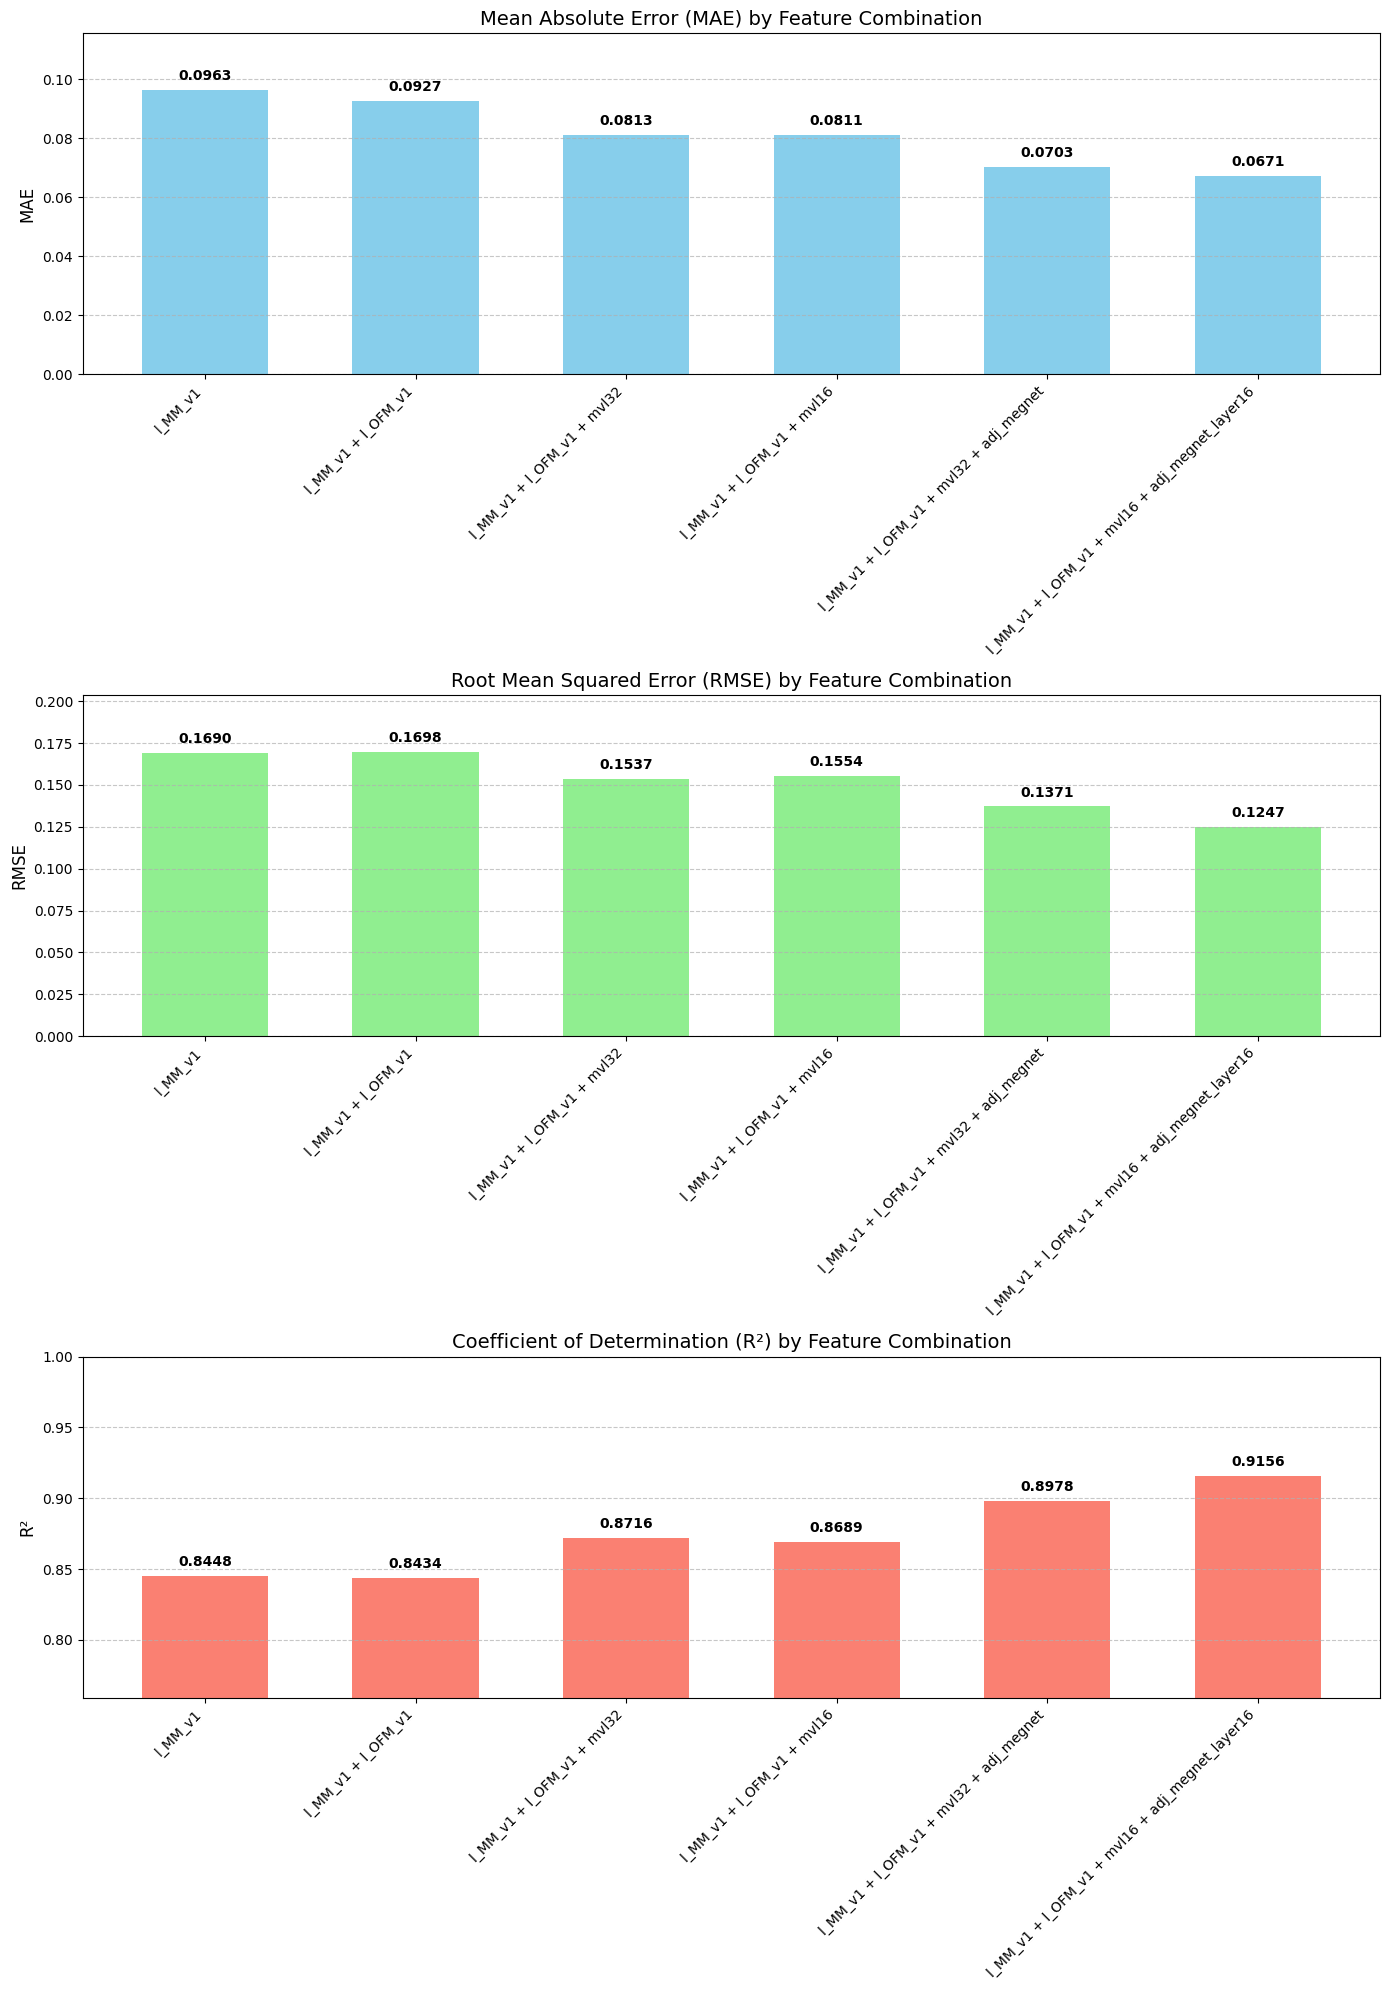

In [6]:
# Extract data for plotting
combinations = metrics_df['Combination']
mae = metrics_df['MAE']
rmse = metrics_df['RMSE']
r2 = metrics_df['R2']

# Number of feature combinations
num_combinations = len(combinations)
x = np.arange(num_combinations)  # the label locations
width = 0.6  # width of the bars

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 20))

# Function to add text annotations on top of bars
def add_text(ax, rects, metric_name):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10,
                    fontweight='bold')

# Plot MAE
rects1 = axs[0].bar(x, mae, width, color='skyblue')
axs[0].set_ylabel('MAE', fontsize=12)
axs[0].set_title('Mean Absolute Error (MAE) by Feature Combination', fontsize=14)
axs[0].set_xticks(x)
axs[0].set_xticklabels(combinations, rotation=45, ha='right', fontsize=10)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_text(axs[0], rects1, 'MAE')
axs[0].set_ylim([0, max(mae)*1.2])

# Plot RMSE
rects2 = axs[1].bar(x, rmse, width, color='lightgreen')
axs[1].set_ylabel('RMSE', fontsize=12)
axs[1].set_title('Root Mean Squared Error (RMSE) by Feature Combination', fontsize=14)
axs[1].set_xticks(x)
axs[1].set_xticklabels(combinations, rotation=45, ha='right', fontsize=10)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_text(axs[1], rects2, 'RMSE')
axs[1].set_ylim([0, max(rmse)*1.2])

# Plot R²
rects3 = axs[2].bar(x, r2, width, color='salmon')
axs[2].set_ylabel('R²', fontsize=12)
axs[2].set_title('Coefficient of Determination (R²) by Feature Combination', fontsize=14)
axs[2].set_xticks(x)
axs[2].set_xticklabels(combinations, rotation=45, ha='right', fontsize=10)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_text(axs[2], rects3, 'R²')
axs[2].set_ylim([min(r2)*0.9, 1.0])  # R² typically ranges up to 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()